In [2]:
import pandas as pd
import seaborn as sns
import warnings 
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("C:/Users/User/Desktop/IT1244-Project/data/application_cleaned.csv")
df.columns

Index(['own_car', 'own_realty', 'num_child', 'income', 'age',
       'years_of_employment', 'mobile', 'work_phone', 'phone', 'email',
       'num_family_members', 'is_female', 'is_male', 'Commercial associate',
       'Pensioner', 'State servant', 'Student', 'Working', 'Academic degree',
       'Higher education', 'Incomplete higher', 'Lower secondary',
       'Secondary / secondary special', 'Civil marriage', 'Married',
       'Separated', 'Single / not married', 'Widow', 'Co-op apartment',
       'House / apartment', 'Municipal apartment', 'Office apartment',
       'Rented apartment', 'With parents', 'Government', 'Sales', 'Unemployed',
       'Unknown', 'has_previous_credit', 'count_X', 'count_C', 'months_late'],
      dtype='object')

In [12]:
from sklearn.cluster import KMeans
error = [] 

for i in range(2, 20):
    # We initialise this with k-means++ instead of normal k-means
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 42)
    kmeans.fit(df)

    # inertia method returns WSS for that model
    error.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

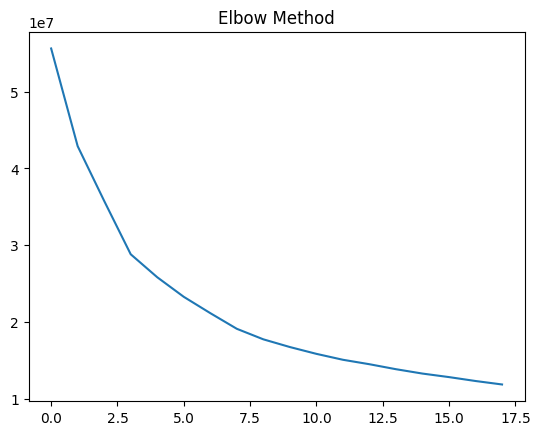

In [13]:
error = np.array(error)
plt.plot(error)
plt.title('Elbow Method')

Reason for high levels of error can be attributed to the length of the dataset itself.

Since the SSE is the sum of the square root of the error of all the datapoints, and considering the big size of the dataset itself, we can therefore explain the high levels of error. However, let's have more number of clusters and judge individually.


In [14]:
kmeans = KMeans(n_clusters = 20, init = 'k-means++', max_iter = 2000, random_state = 42)
kmeans.fit(df)

KMeans(max_iter=2000, n_clusters=20, random_state=42)

In [15]:
df['clusters'] = kmeans.labels_
df['clusters'].value_counts()

0     48615
13    46468
8     45693
12    43881
1     37335
10    36803
19    31346
4     31126
14    28972
6     25200
2     17148
16    14695
5      9622
17     6310
3      3974
7      3911
11     3370
9      2361
18     1697
15       30
Name: clusters, dtype: int64

Let's think in the shoes of a bank.

When they want to approve credit cards, they will look at "red flags" to determine whether or not they will default.

We have identified two columns here:
1. If there is credit history - for the most part, the higher the number of months late, the more likely the person is to default.

2. If someone is being unemployed. This would mean that it will take some time for them to pay back credit and therefore it will be better to NOT approve the credit card.

In this case, it would mean that cluster 1, 10, 11 and 14 are problematic and should be avoided.

In [16]:
df['outcome']= df['clusters'].apply(lambda x: 0 if x in [1, 10, 11, 14] else 1)
df.drop('clusters', axis = 1, inplace = True)

In [17]:
df.to_csv("application_with_clusters.csv")

In [18]:
import pickle 

kmeans_file = 'kmeans.bin'

with open(kmeans_file, 'wb') as f_out:
    pickle.dump(kmeans, f_out)

print("K-means clustering saved")

K-means clustering saved
